In [15]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [3]:
df = pd.read_csv('Tree_Data_Preprocessed.csv')

In [4]:
y_col = "Alive"
X_cols = list(df.drop(columns=[y_col]).columns)

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[X_cols], df[y_col], test_size=0.33, random_state=42)

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.neural_network import MLPClassifier

classifier_accuracies = []

classifiers = {
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "SVM": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Logistic Regression": LogisticRegression(),
    "Naive Bayes": GaussianNB(),
    "AdaBoost": AdaBoostClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Bagging": BaggingClassifier(),
    "Extra Trees": ExtraTreesClassifier(),
    "Voting": VotingClassifier(estimators=[
        ('lr', LogisticRegression()),
        ('rf', RandomForestClassifier()),
        ('svc', SVC())
    ]),
    "Stacking": StackingClassifier(estimators=[
        ('lr', LogisticRegression()),
        ('rf', RandomForestClassifier()),
        ('svc', SVC())
    ], final_estimator=RandomForestClassifier()),
    "MLP": MLPClassifier(max_iter=1000)
}

for name, classifier in classifiers.items():
    accuracies = []
    for i in range(5):
        classifier.fit(X_train, y_train)
        y_pred = classifier.predict(X_test)
        accuracies.append(accuracy_score(y_test, y_pred))
    classifier_accuracies.append([name, sum(accuracies) / len(accuracies)])

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [37]:
classifier_accuracies

[['Random Forest', 0.8550598476605005],
 ['Decision Tree', 0.8221980413492928],
 ['SVM', 0.8248095756256802],
 ['K-Nearest Neighbors', 0.8541893362350381],
 ['Logistic Regression', 0.8128400435255714],
 ['Naive Bayes', 0.7290533188248096],
 ['AdaBoost', 0.840043525571273],
 ['Gradient Boosting', 0.847442872687704],
 ['Bagging', 0.8526659412404788],
 ['Extra Trees', 0.8422198041349294],
 ['Voting', 0.8291621327529924],
 ['Stacking', 0.8359085963003265],
 ['MLP', 0.8365614798694233]]

In [38]:
classifier_accuracies = sorted(classifier_accuracies, key = lambda x: x[1], reverse = True)

In [39]:
classifier_accuracies = pd.DataFrame(classifier_accuracies, columns=['classifier', 'accuracy'])

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, 'Random Forest'),
  Text(1, 0, 'K-Nearest Neighbors'),
  Text(2, 0, 'Bagging'),
  Text(3, 0, 'Gradient Boosting'),
  Text(4, 0, 'Extra Trees'),
  Text(5, 0, 'AdaBoost'),
  Text(6, 0, 'MLP'),
  Text(7, 0, 'Stacking'),
  Text(8, 0, 'Voting'),
  Text(9, 0, 'SVM'),
  Text(10, 0, 'Decision Tree'),
  Text(11, 0, 'Logistic Regression'),
  Text(12, 0, 'Naive Bayes')])

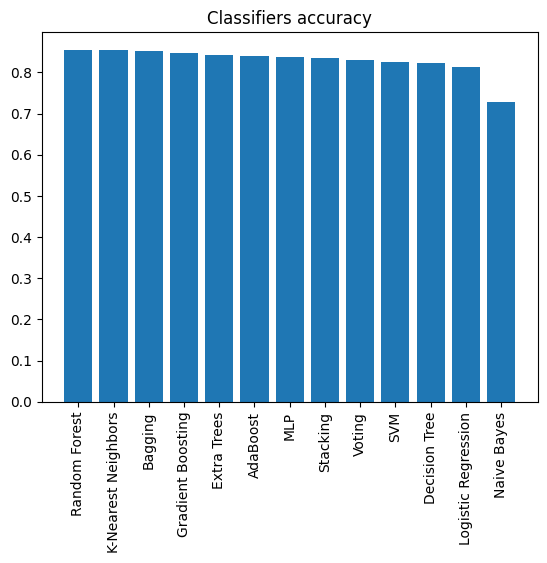

In [40]:
plt.bar(classifier_accuracies['classifier'], classifier_accuracies['accuracy'])
plt.title('Classifiers accuracy')
plt.xticks(rotation=90)

## Selected baseline
model: **Random Forest**

mean accuracy: **0.8550598476605005**